In [84]:
import numpy as np
import matplotlib.pyplot as plt
import time


In [273]:
x = np.linspace(0, 4, 100)
freq1 = 50
freq2 = 150

In [274]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [275]:
first_signal = np.cos(2 * np.pi * freq1 * x)
second_signal = np.cos(2 * np.pi * freq2 * x)


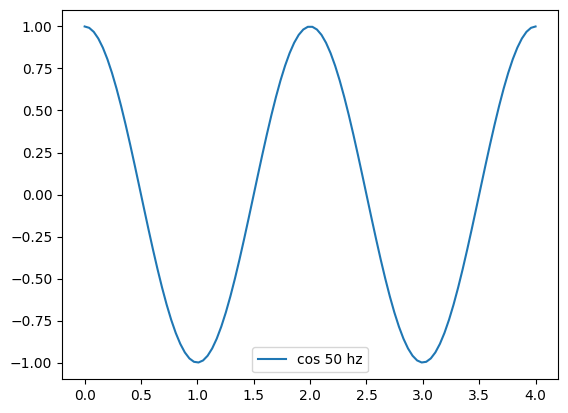

In [276]:
plt.plot(x, first_signal, label='cos 50 hz')
plt.legend()
plt.show()

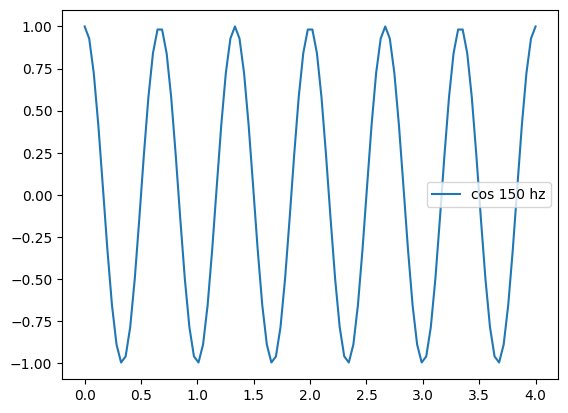

In [243]:
plt.plot(x, second_signal, label='cos 150 hz')
plt.legend()
plt.show()

In [244]:
start_time_fast = time.time()
first_signal_spectrum_fft = np.fft.fft(first_signal)
second_signal_spectrum_fft = np.fft.fft(second_signal)
end_time_fast = time.time()


start_time_slow = time.time()
first_signal_spectrum_slow = DFT_slow(first_signal)
second_signal_spectrum_slow = DFT_slow(second_signal)
end_time_slow = time.time()

print('Время от fft()', end_time_fast - start_time_fast)
print('Время от DFT_slow()', end_time_slow - start_time_slow)

Время от fft() 0.0
Время от DFT_slow() 0.003082275390625


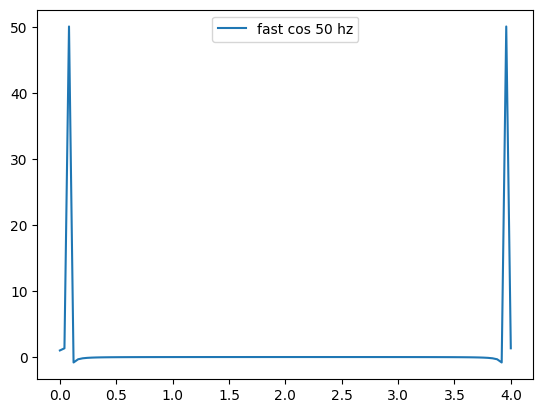

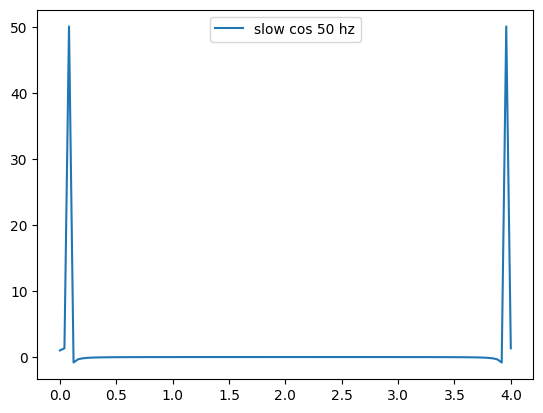

In [245]:
plt.plot(x, first_signal_spectrum_fft, label='fast cos 50 hz')
plt.legend()
plt.show()

plt.plot(x, first_signal_spectrum_slow, label='slow cos 50 hz')
plt.legend()
plt.show()

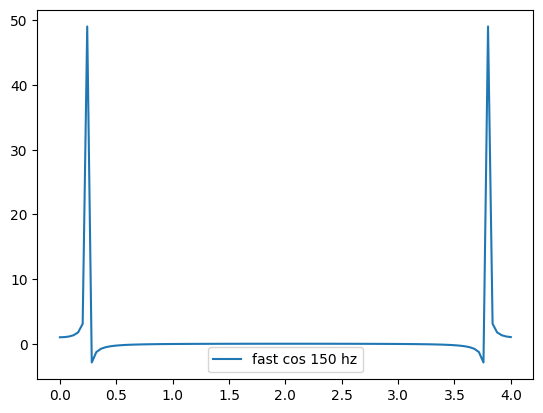

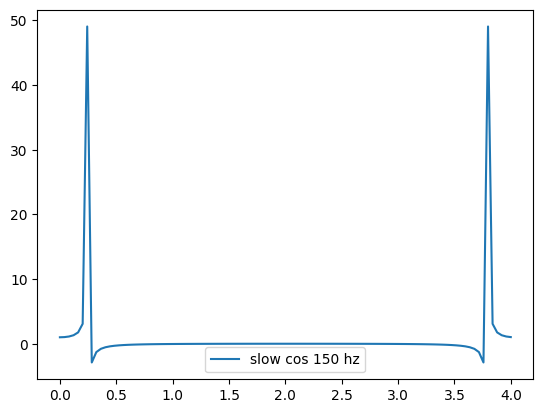

In [246]:
plt.plot(x, second_signal_spectrum_fft, label='fast cos 150 hz')
plt.legend()
plt.show()

plt.plot(x, second_signal_spectrum_slow, label='slow cos 150 hz')
plt.legend()
plt.show()

In [247]:
unspectrum_signal_first = np.fft.ifft(first_signal_spectrum_fft)

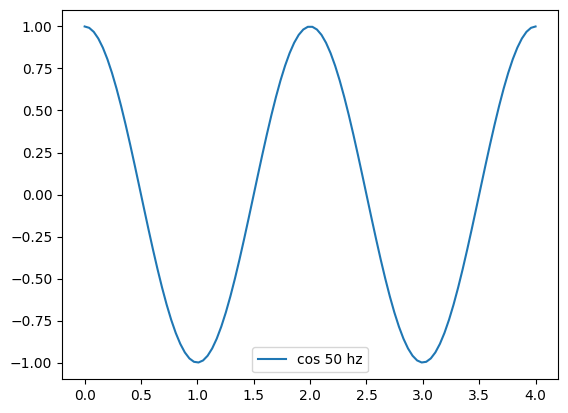

In [248]:
plt.plot(x, unspectrum_signal_first, label='cos 50 hz')
plt.legend()
plt.show()


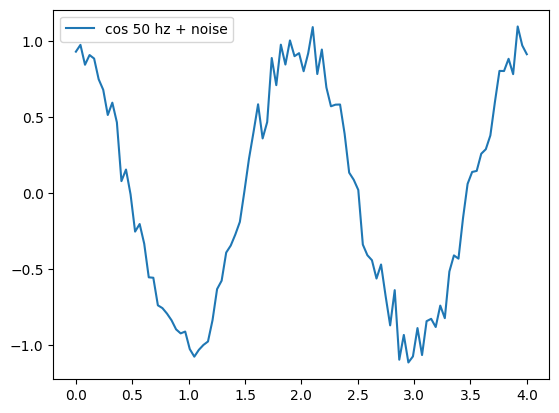

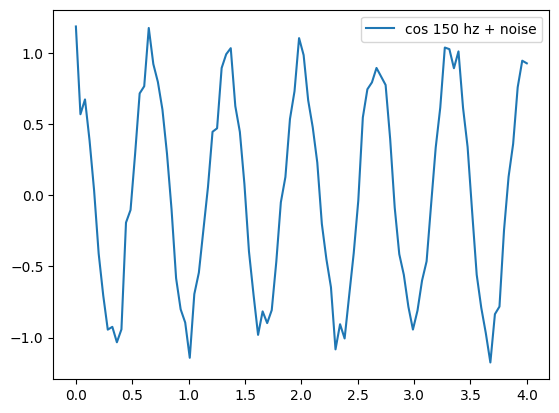

In [249]:
first_noise = first_signal + np.random.normal(0, 1, x.shape) /10
second_noise = second_signal + np.random.normal(0, 1, x.shape) / 10

plt.plot(x, first_noise, label='cos 50 hz + noise')
plt.legend()
plt.show()

plt.plot(x, second_noise, label='cos 150 hz + noise')
plt.legend()
plt.show()


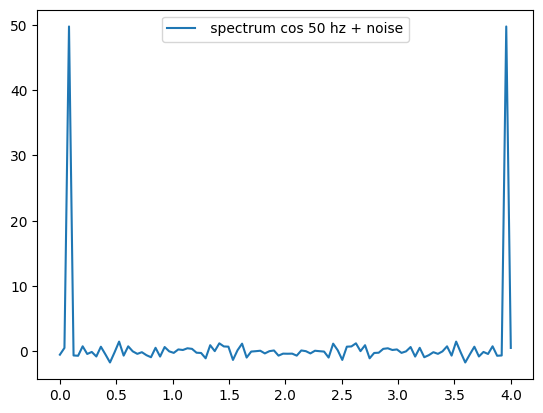

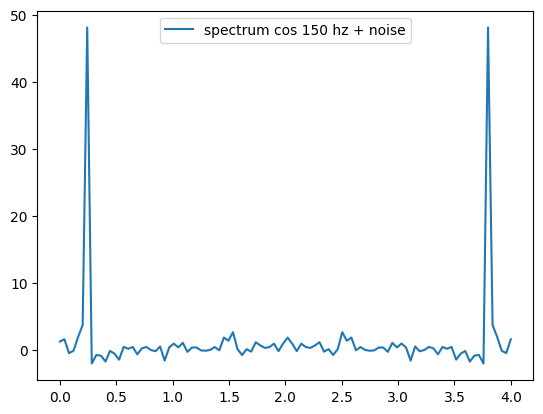

In [250]:
first_noise_spectrum = np.fft.fft(first_noise)
second_noise_spectrum = np.fft.fft(second_noise)

plt.plot(x, first_noise_spectrum, label=' spectrum cos 50 hz + noise')
plt.legend()
plt.show()

plt.plot(x, second_noise_spectrum, label='spectrum cos 150 hz + noise')
plt.legend()
plt.show()

In [251]:
def function(t):
    T = 2
    duty_cycle = 0.5
    A = 2
    return square(2 * np.pi * t / T, duty=duty_cycle) * A

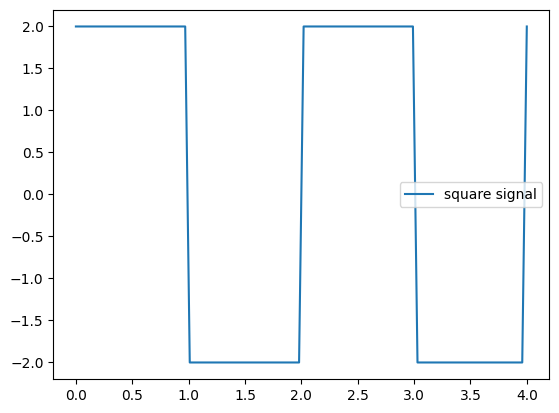

In [252]:
sq = function(x)

plt.plot(x, sq, label='square signal')
plt.legend()
plt.show()

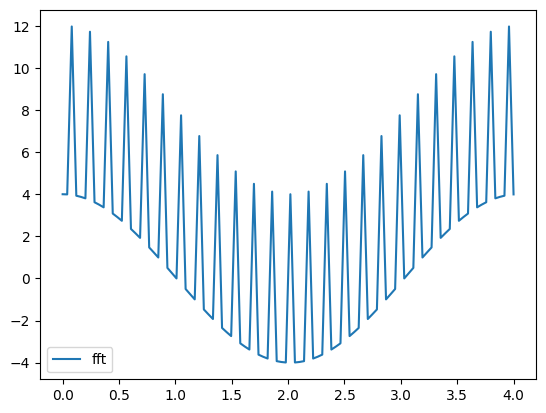

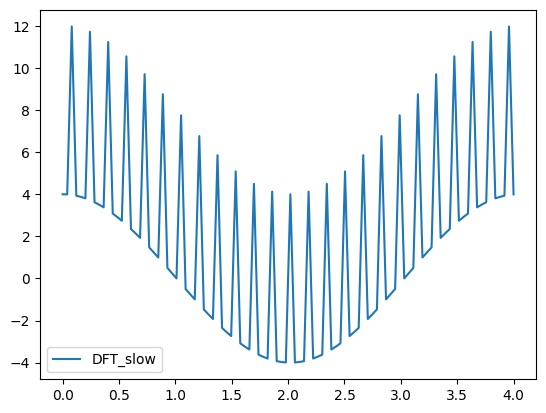

In [253]:
spectrum_sq_fast = np.fft.fft(sq)
spectrum_sq_slow = DFT_slow(sq)

plt.plot(x, spectrum_sq_fast, label='fft')
plt.legend()
plt.show()

plt.plot(x, spectrum_sq_slow, label='DFT_slow')
plt.legend()
plt.show()

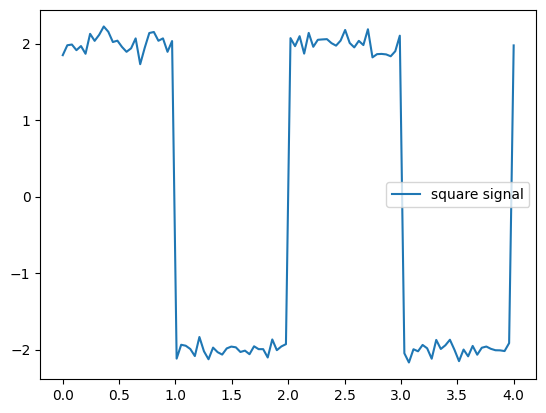

In [254]:
noise_sq = sq + np.random.normal(0, 1, sq.shape) / 10

plt.plot(x, noise_sq, label='square signal')
plt.legend()
plt.show()

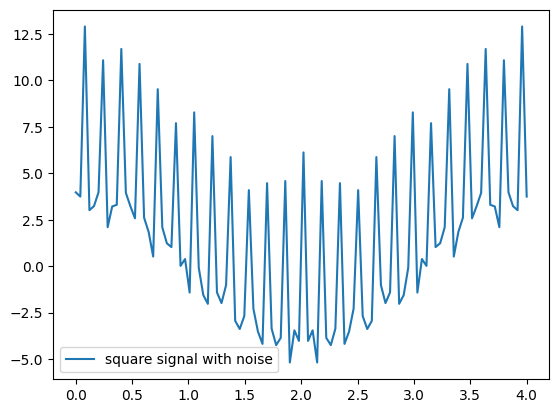

In [255]:
spectrum_sq_noise = np.fft.fft(noise_sq)

plt.plot(x, spectrum_sq_noise, label='square signal with noise')
plt.legend()
plt.show()


In [299]:
x_1 = np.linspace(0, 4, 128)
third_signal = np.cos(2 * np.pi * freq1 * x_1)

def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    T = [np.exp(-2j*np.pi*k/N) * odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + \
           [even[k] - T[k] for k in range(N//2)]

In [303]:
start_time_fast = time.time()
third_signal_spectrum = np.fft.fft(third_signal)
end_time_fast = time.time()

start_time_self = time.time()
third_signal_spectrum = fft(third_signal)
end_time_self = time.time()

print('Время от fft()', end_time_self - start_time_self)
print('Время от np.fft.fft', end_time_fast - start_time_fast)

Время от fft() 0.0025250911712646484
Время от np.fft.fft 0.0


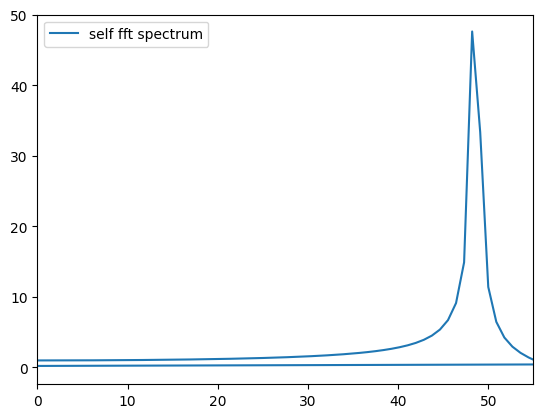

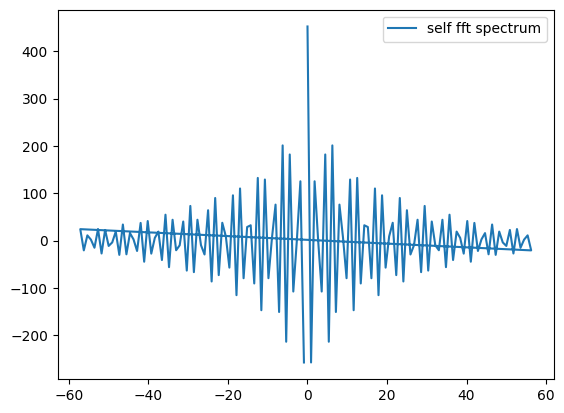

In [327]:
third_signal_spectrum =np.abs(fft(third_signal))
x_1 = np.fft.fftfreq(128, 0.00875)
plt.plot(x_1, third_signal_spectrum, label='self fft spectrum')
plt.xlim(0, 55)
plt.legend()

plt.show()
